Load in all libraries needed for the notebook

In [105]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, recall_score, roc_auc_score, roc_curve, r2_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

Importing the datset into the notebook

In [106]:
# Loading datset
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

In [107]:
# Checking loaded dataset
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Stage 1: Data Cleaning

In [108]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [109]:
# Data Checking
df.sample(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
79233,79233,11NT523llsajdTS0yVddPR,Smyang Piano,"Piano Collection, Vol. 1",Spring Day,45,286406,False,0.382,0.132,...,-18.340,1,0.0471,0.974000,0.938000,0.0957,0.0394,115.584,4,piano
47669,47669,0K6yUnIKNsFtfIpTgGtcHm,Rush,Moving Pictures (2011 Remaster),Limelight,67,259839,False,0.581,0.854,...,-8.485,0,0.0428,0.001970,0.001300,0.1110,0.7880,131.180,4,hard-rock
107544,107544,6VilHBIz6OdyKbMwSlPisJ,Indochine,Paradize,La nuit des fées,26,298213,False,0.550,0.663,...,-6.787,1,0.0269,0.000678,0.000051,0.3810,0.4870,83.969,4,synth-pop
67633,67633,3dW4DA60BaHXKRHj1k1BWf,Cristian Castro,Halloween 2022 Pop Vol. 2,Lo Dudo,0,264693,False,0.395,0.529,...,-7.877,0,0.0333,0.618000,0.000064,0.1150,0.3080,173.693,4,latin
22594,22594,36xRtAOogMyyvoFHspk06W,Tankard,Eintracht Frankfurt : Alle Zusammen (Best of 1...,Forza SGE,23,234812,False,0.497,0.809,...,-6.759,1,0.0301,0.001150,0.000000,0.1010,0.5910,84.945,4,death-metal
73994,73994,4VaDdlxgdWNAAXo9NLQ9QF,DI MI DO,Playlist Nature Walking (Tour 1),Lock Me High - Helmut Wintermantel Mix,17,139306,False,0.593,0.931,...,-5.104,0,0.0333,0.001550,0.832000,0.1690,0.0642,123.985,4,minimal-techno
14868,14868,09XpPlP8V2SMZ81Qyos9jL,Mellodees,Kids Songs & Medlees Vol 2,Hush Little Baby,42,134400,False,0.588,0.928,...,-2.459,1,0.0418,0.174000,0.000000,0.1130,0.6110,150.025,4,children
5931,5931,38gqeaSyRwk64S9Xf1xDzD,Otaku,Anime Lofi Vol. 1,The Hero (One Punch Man),52,101151,False,0.744,0.158,...,-11.529,0,0.0430,0.231000,0.852000,0.1040,0.1120,140.190,4,anime
14193,14193,7dIxAgzGUACaUCFH9HrTy6,VeggieTales,Upbeat Kids Songs!,We Got The Beat,0,155786,False,0.728,0.962,...,-3.019,1,0.2030,0.011500,0.000333,0.1140,0.6450,151.964,4,children
54795,54795,5UP7u3IqcRJALFM2pyaIzu,Susumu Yokota,Grinning Cat,Cherry Blossom,11,325320,False,0.332,0.341,...,-12.700,1,0.0448,0.059600,0.506000,0.2470,0.0812,124.835,4,idm


In [110]:
df.shape

(114000, 21)

In [111]:
len(df["track_id"].unique())

89741

In [112]:
#Check for duplicates (there are duplicates)
duplicate_track_count = df.shape[0] - len(df["track_id"].unique())
print(f"Number of duplicate track IDs: {duplicate_track_count}")

Number of duplicate track IDs: 24259


In [113]:
track_id_counts = df.groupby('track_id')['track_id'].count()
duplicate_track_ids = track_id_counts[track_id_counts > 1]
print(duplicate_track_ids)

track_id
001APMDOl3qtx1526T11n1    2
001YQlnDSduXd5LgBd66gT    2
003vvx7Niy0yvhvHt4a68B    3
004h8smbIoAkUNDJvVKwkG    2
006rHBBNLJMpQs8fRC2GDe    3
                         ..
7ztSVy67w9rXpKg5L2zN5l    2
7zubR9uYAWjb5KPZTMm85e    4
7zumacGldlmxpoP8bpaeLe    2
7zv2vmZq8OjS54BxFzI2wM    2
7zwn1eykZtZ5LODrf7c0tS    3
Name: track_id, Length: 16641, dtype: int64


In [114]:
df.select_dtypes('number').describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [115]:
# Find the number of unique genres (should be 125)
unique_genres_count = df['track_genre'].nunique()
print(f"Number of unique genres: {unique_genres_count}")

Number of unique genres: 114


In [116]:
# Find the number of unique modes(should be 2)
unique_mode_count = df['mode'].nunique()
print(f"Number of unique mode: {unique_mode_count}")

Number of unique mode: 2


In [117]:
# Find the number of unique keys(should be 12)
unique_key_count = df['key'].nunique()
print(f"Number of key mode: {unique_key_count}")

Number of key mode: 12


In [118]:
# Check for missing values in each of the columns
for column in df.columns:
  missing_values = df[column].isnull().sum()
  print(f"'{column}':{missing_values}")

'Unnamed: 0':0
'track_id':0
'artists':1
'album_name':1
'track_name':1
'popularity':0
'duration_ms':0
'explicit':0
'danceability':0
'energy':0
'key':0
'loudness':0
'mode':0
'speechiness':0
'acousticness':0
'instrumentalness':0
'liveness':0
'valence':0
'tempo':0
'time_signature':0
'track_genre':0


In [119]:
# Find rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

print(rows_with_missing_values)

       Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
65900           0            0     False         0.501   0.583  ...     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  
65900  138.391               4        k-pop  

[1 rows x 21 columns]


In [120]:
# Look at the data types of each column
print(df.dtypes)

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [121]:
# Data Cleaning Function
def clean_data(df):
  clean_df = df.copy()
  clean_df = clean_df.drop('Unnamed: 0', axis=1, errors='ignore')
  clean_df = clean_df.dropna()

  #Encode explicit column (binary encoding)
  clean_df['explicit'] = clean_df['explicit'].astype(int)

  #Remove track_id, artists,album_name, track_name, track_genre
  clean_df = clean_df.drop(['track_id', 'artists', 'album_name', 'track_name','track_genre'], axis=1)

  return clean_df

In [122]:
spotify_cleaned_df = clean_data(df)
# Checking the clean data
spotify_cleaned_df.head(10)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
5,58,214240,0,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4
6,74,229400,0,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3
7,80,242946,0,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4
8,74,189613,0,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4
9,56,205594,0,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4


### Stage 2: Exploratory Data Analysis

In [123]:
# Calculate summary statistics for numeric columns
summary_stats = spotify_cleaned_df.describe()
print(summary_stats)

          popularity   duration_ms       explicit   danceability  \
count  113999.000000  1.139990e+05  113999.000000  113999.000000   
mean       33.238827  2.280312e+05       0.085501       0.566801   
std        22.304959  1.072961e+05       0.279627       0.173543   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.000000       0.456000   
50%        35.000000  2.129060e+05       0.000000       0.580000   
75%        50.000000  2.615060e+05       0.000000       0.695000   
max       100.000000  5.237295e+06       1.000000       0.985000   

              energy            key       loudness           mode  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        0.641383       5.309126      -8.258950       0.637558   
std         0.251530       3.559999       5.029357       0.480708   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

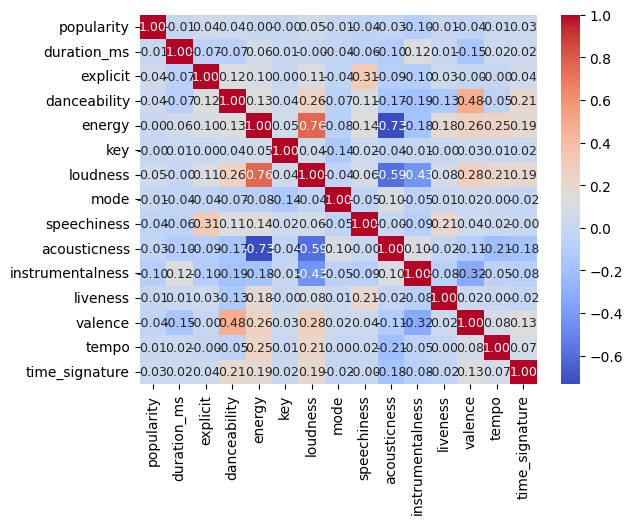

In [124]:
# Correlation matrix
numeric_cols = spotify_cleaned_df.select_dtypes(include=['number'])
# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Visualize with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f",annot_kws={"size": 9})
plt.show()

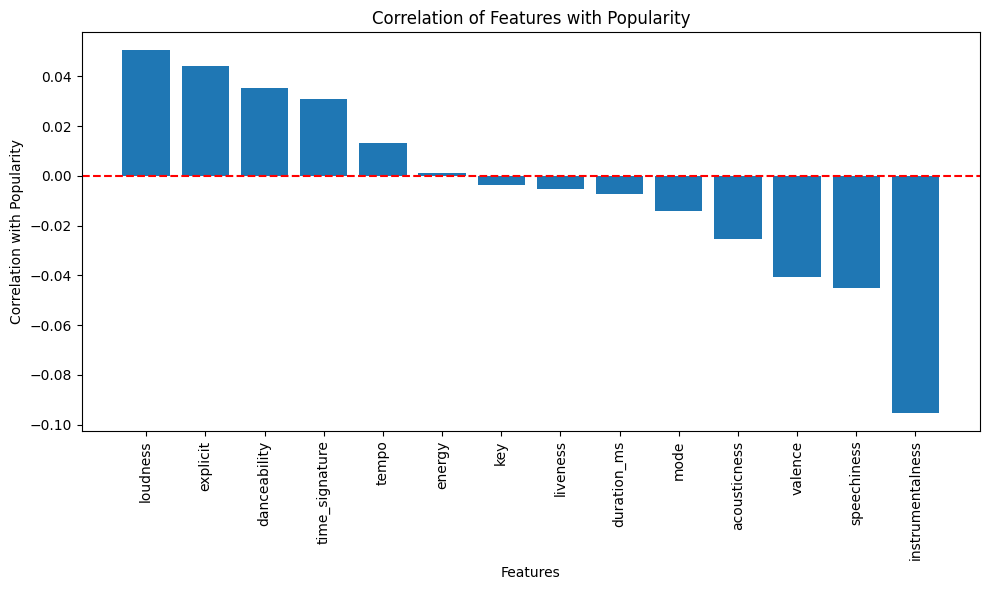

In [125]:
# Calculate the correlation between numerical features and popularity
correlation_with_popularity = numeric_cols.corr()['popularity'].sort_values(ascending=False)

# Remove the correlation with itself (popularity with popularity)
correlation_with_popularity = correlation_with_popularity.drop('popularity')

# Create a bar plot of the correlation values
plt.figure(figsize=(10, 6))
plt.bar(correlation_with_popularity.index, correlation_with_popularity.values)
plt.axhline(y=0, color='red', linestyle='--')  # Add a line at y=0
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Correlation with Popularity')
plt.title('Correlation of Features with Popularity')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

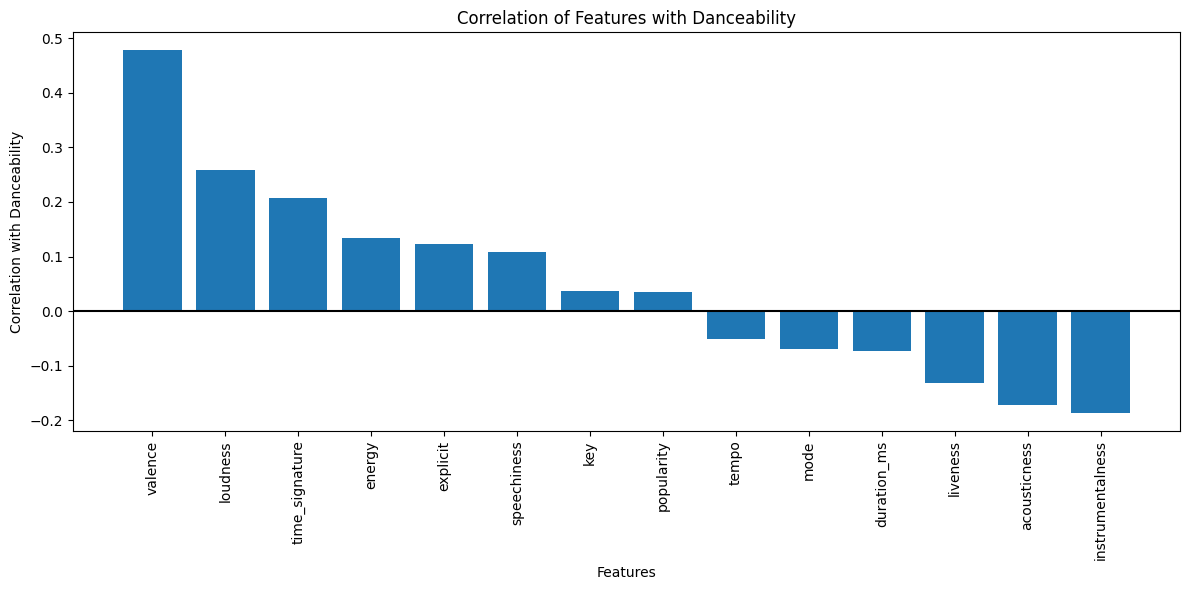

In [126]:
# Calculate correlations between numeric features and 'danceability'
correlation_with_danceability = numeric_cols.corr()['danceability'].sort_values(ascending=False)

# Remove the correlation with 'danceability' itself
correlation_with_danceability = correlation_with_danceability.drop('danceability')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(correlation_with_danceability.index, correlation_with_danceability.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Danceability')
plt.title('Correlation of Features with Danceability')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.axhline(y=0, color='black', linestyle='-')  # Add a line at y=0
plt.tight_layout()
plt.show()

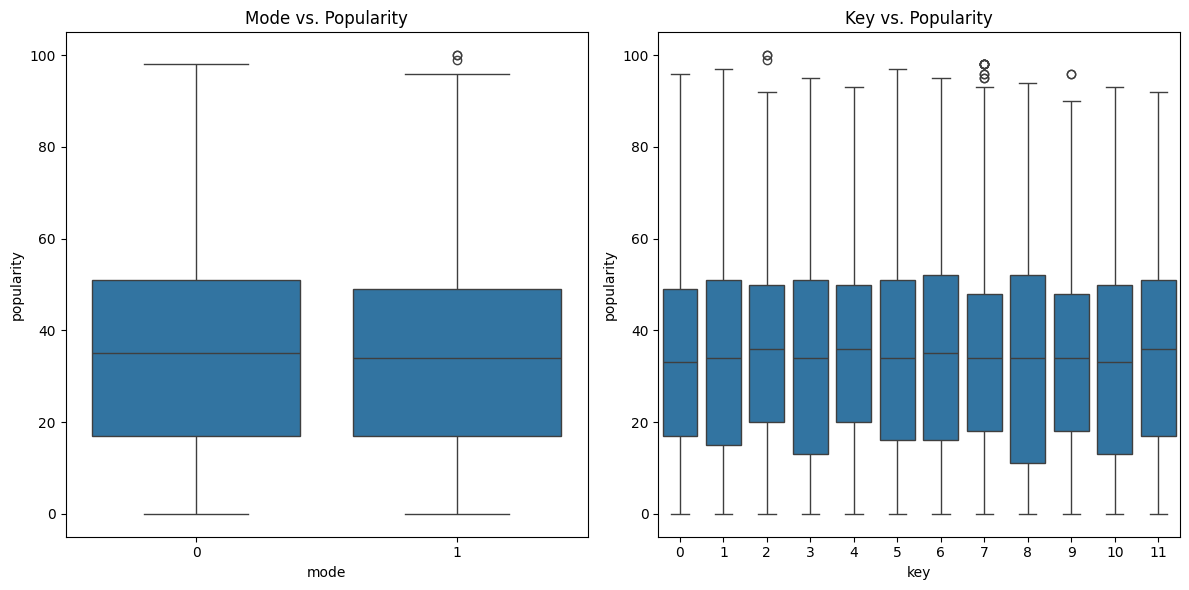

In [127]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for mode vs popularity
sns.boxplot(x='mode', y='popularity', data=spotify_cleaned_df, ax=axes[0])
axes[0].set_title('Mode vs. Popularity')

# Box plot for key vs popularity
sns.boxplot(x='key', y='popularity', data=spotify_cleaned_df, ax=axes[1])
axes[1].set_title('Key vs. Popularity')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

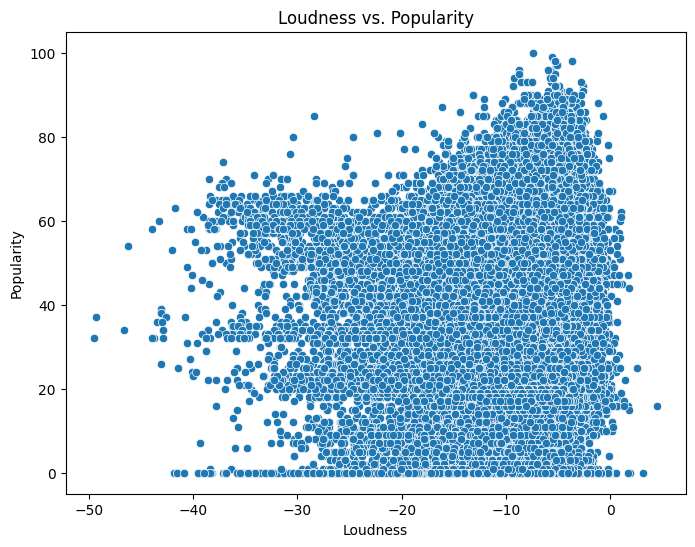

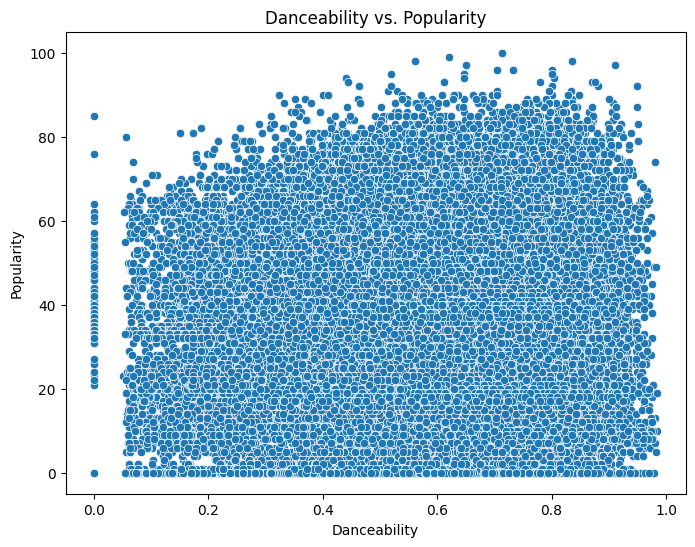

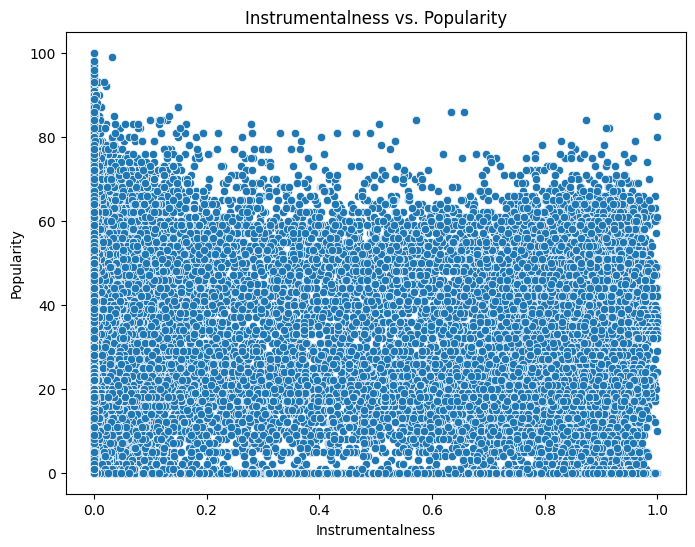

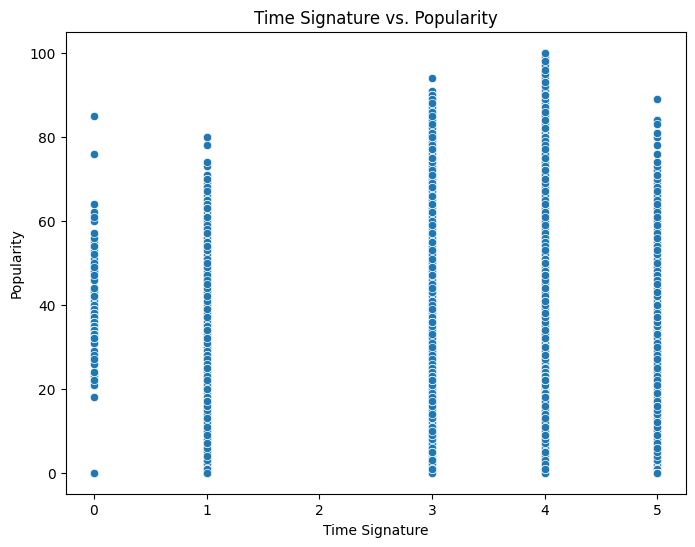

In [128]:
# Scatter plot for loudness vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loudness', y='popularity', data=spotify_cleaned_df)
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.title('Loudness vs. Popularity')
plt.show()

# Scatter plot for danceability vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability', y='popularity', data=spotify_cleaned_df)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Danceability vs. Popularity')
plt.show()

# Scatter plot for instrumentalness vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='instrumentalness', y='popularity', data=spotify_cleaned_df)
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.title('Instrumentalness vs. Popularity')
plt.show()

# Scatter plot for time_signature vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='time_signature', y='popularity', data=spotify_cleaned_df)
plt.xlabel('Time Signature')
plt.ylabel('Popularity')
plt.title('Time Signature vs. Popularity')
plt.show()

### Stage 3: Logistic Regression

In [129]:
# Split data into train and testing set
X_train, X_test, y_train, y_test = train_test_split(spotify_cleaned_df.drop('explicit', axis=1), spotify_cleaned_df['explicit'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((91199, 14), (22800, 14), (91199,), (22800,))

In [130]:
y_train.head()

,explicit
96253,0
70417,0
66688,0
51391,0
95123,0


In [131]:
#Class imbalance in y_train
y_train.value_counts()

,count
explicit,
0,83348
1,7851


In [132]:
7851/(7851+83348)*100 #Really small percentage of explicit (True)

8.60864702463843

## Stage 5: KNN or Random Forest Algorithm

In [133]:
# Train and Fit Model for KNN Classifier (n = 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

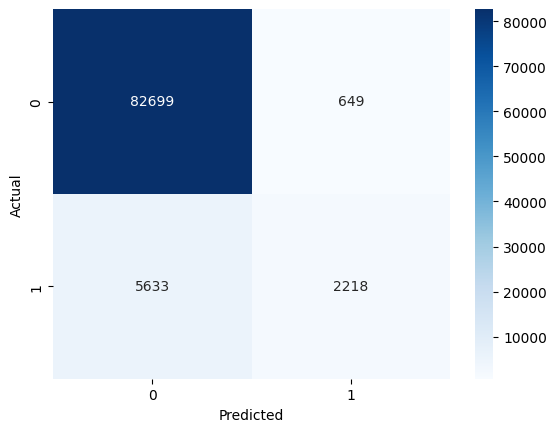

In [134]:
# Confusion Matrix
y_pred_train = knn.predict(X_train)
cm_knn = confusion_matrix(y_train, y_pred_train)
cm_knn
sns.heatmap(cm_knn, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [135]:
# Prediction Accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print("Prediction Accuracy:", accuracy)

Prediction Accuracy: 0.931117665763879


In [136]:
# Prediction Error
error = (cm_knn[0,1] + cm_knn[1,0])/cm_knn.sum()
print("Prediction Error:", error)

Prediction Error: 0.06888233423612102


In [137]:
# True Positive Rate
tpr = recall_score(y_train, y_pred_train, pos_label=1)
print("True Positive Rate:", tpr)

True Positive Rate: 0.28251178193860654


In [138]:
# True Negative Rate
tnr = recall_score(y_train, y_pred_train, pos_label=0)
print("True Negative Rate:", tnr)

True Negative Rate: 0.9922133704468014


In [139]:
# F1 Score
f1 = f1_score(y_train, y_pred_train)
print("F1 Score:", f1)

F1 Score: 0.4138831871617839


In [140]:
#Classification Report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     83348
           1       0.77      0.28      0.41      7851

    accuracy                           0.93     91199
   macro avg       0.85      0.64      0.69     91199
weighted avg       0.92      0.93      0.92     91199



In [141]:
# Calculating the ROC curve and the AUC score of KNN
y_pred_proba = knn.predict_proba(X_test)[:, 1]
y_pred = knn.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

Text(0.5, 1.0, 'ROC Curve')

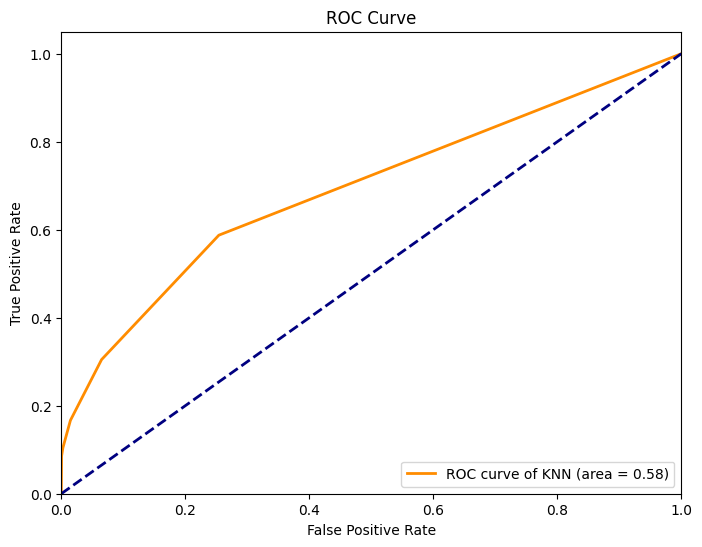

In [142]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve of KNN (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [143]:
# Area Under the Curve (under the ROC curve) Score
knn_auc = roc_auc_score(y_test, y_pred)
knn_auc

0.575966322234979

### Stage 5: Cross Validation

In [144]:
# Using 5-fold cross-validation on the validation set (calculate the AUC and accuracy of each fold)
X = X_test
y = y_test
cross_val_score(knn, X, y, cv=5, scoring='roc_auc')

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_index, test_index in skfolds.split(X, y):
    clone_lr = clone(knn)
    X_train_folds = X.iloc[train_index]
    y_train_folds = y.iloc[train_index]
    X_test_fold = X.iloc[test_index]
    print(test_index)
    clone_lr.fit(X_train_folds, y_train_folds)
    y_pred = clone_lr.predict(X_test_fold)

    auc_sample = roc_auc_score(y_true=y.iloc[test_index], y_score=y_pred)
    print("Fold: ", i, "\nAUC: ", auc_sample, '\nAccuracy: ', accuracy_score(y_true=y.iloc[test_index], y_pred=y_pred))
    i += 1

[   0    1    2 ... 4619 4632 4641]
Fold:  1 
AUC:  0.5200432412238049 
Accuracy:  0.9118421052631579
[4550 4551 4552 ... 9273 9287 9298]
Fold:  2 
AUC:  0.526280781446915 
Accuracy:  0.9122807017543859
[ 9109  9110  9111 ... 13677 13678 13679]
Fold:  3 
AUC:  0.528433376519864 
Accuracy:  0.9162280701754386
[13680 13681 13682 ... 18237 18248 18272]
Fold:  4 
AUC:  0.5241243999270478 
Accuracy:  0.9105263157894737
[18238 18239 18240 ... 22797 22798 22799]
Fold:  5 
AUC:  0.5284688995215311 
Accuracy:  0.9140350877192982
